# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn as sk
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import (CountVectorizer , TfidfVectorizer)
from sklearn.datasets import fetch_20newsgroups

In [2]:
# Algumas configurações para o matplotlib.
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

# sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [5]:
# Conhecendo os dados
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    object 
 5   Coastline_ratio   227 non-null    object 
 6   Net_migration     224 non-null    object 
 7   Infant_mortality  224 non-null    object 
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    object 
 10  Phones_per_1000   223 non-null    object 
 11  Arable            225 non-null    object 
 12  Crops             225 non-null    object 
 13  Other             225 non-null    object 
 14  Climate           205 non-null    object 
 15  Birthrate         224 non-null    object 
 16  Deathrate         223 non-null    object 
 1

In [6]:
# Valores NaN
countries.isna().sum()

Country              0
Region               0
Population           0
Area                 0
Pop_density          0
Coastline_ratio      0
Net_migration        3
Infant_mortality     3
GDP                  1
Literacy            18
Phones_per_1000      4
Arable               2
Crops                2
Other                2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
dtype: int64

In [7]:
# Colunas númericas que estão como object
colunas_obj = ["Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"]

In [8]:
# Ajustando os dados
countries[colunas_obj] = countries[colunas_obj].replace(to_replace=',', value='.', regex=True).astype(float)

countries['Country'] = countries['Country'].str.strip()
countries['Region'] = countries['Region'].str.strip()

In [9]:
countries.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [10]:
resposta_1 = list(countries['Region'].sort_values(ascending=True).unique())
resposta_1

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

In [11]:
def q1():
    return resposta_1

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [12]:
discret = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [13]:
disc_pop = discret.fit_transform(countries[['Pop_density']])
print(disc_pop[:5],'  ', discret.bin_edges_)

[[3.]
 [6.]
 [1.]
 [8.]
 [7.]]    [array([0.00000e+00, 1.01400e+01, 2.12200e+01, 3.94800e+01, 5.98000e+01,
       7.88000e+01, 1.05540e+02, 1.50120e+02, 2.53700e+02, 3.96740e+02,
       1.62715e+04])]


In [14]:
resposta_2 = len(disc_pop[disc_pop > np.quantile(disc_pop, 0.9)])
resposta_2

23

In [15]:
# Outra alternativa de fazer
len(disc_pop[disc_pop > (disc_pop[10])])

23

In [16]:
def q2():
    return resposta_2

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [17]:
# Valores missing

countries['Climate'] = countries['Climate'].fillna(countries['Climate'].mean())

In [18]:
resposta_3 = len(pd.get_dummies(countries['Region']).columns) + len(pd.get_dummies(countries['Climate']).columns)
resposta_3

18

In [19]:
# Outra alternativa 
(countries['Region'].nunique() + countries['Climate'].nunique()) 

18

In [20]:
def q3():
    return resposta_3

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [21]:
algoritmos = []

# Modelo SimpleImputer
algoritmos.append(('Imputer', SimpleImputer(strategy='median')))

# Modelo StandardScaler
algoritmos.append(('Padronizacao', StandardScaler()))

# Criando o Pipeline
pipe = Pipeline(algoritmos)
pipe

Pipeline(memory=None,
         steps=[('Imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('Padronizacao',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

In [22]:
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density         float64
Coastline_ratio     float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones_per_1000     float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

In [50]:
# Colunas float e int
coluna_continua = countries.columns[2:len(countries.columns)]
# Aplicando o pipeline
pipe.fit(countries[coluna_continua])

pipe_transf = pipe.transform(countries[coluna_continua])

pipe_transf[:2]

array([[ 0.01969468,  0.02758332, -0.19984434, -0.29344342,  4.75079803,
         3.6380982 , -0.89639423, -2.49781686, -1.02749132, -0.12636082,
        -0.51886111,  0.37260169, -1.71793694,  2.21296666,  2.2525074 ,
         1.63657562, -0.31540576, -1.1611354 ],
       [-0.21387688, -0.31879748, -0.15360296, -0.27597435, -1.02509671,
        -0.39284992, -0.51671798,  0.15193269, -0.72607882,  0.56511516,
        -0.01360389, -0.44793341,  1.29856903, -0.62798617, -0.8093326 ,
         0.59516349, -0.70631815,  0.08342432]])

In [51]:
novo = pd.DataFrame(pipe_transf, columns= coluna_continua)
novo.head(10)

,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.019695,0.027583,-0.199844,-0.293443,4.750798,3.638098,-0.896394,-2.497817,-1.027491,-0.126361,-0.518861,0.372602,-1.717937,2.212967,2.252507,1.636576,-0.315406,-1.161135
1,-0.213877,-0.318797,-0.153603,-0.275974,-1.025097,-0.392850,-0.516718,0.151933,-0.726079,0.565115,-0.013604,-0.447933,1.298569,-0.627986,-0.809333,0.595163,-0.706318,0.083424
2,0.035618,0.998421,-0.220490,-0.292889,-0.088242,-0.122886,-0.366846,-0.713827,-0.695494,-0.813978,-0.515252,0.926276,-1.717937,-0.444844,-0.932859,-0.326627,2.390911,-1.673969
3,-0.243834,-0.334779,-0.053514,0.514709,-4.281389,-0.741696,-0.167016,0.702871,0.108568,-0.290741,1.259163,-0.416135,-0.209684,0.035113,-1.204213,-0.340700,-0.074844,0.033392
4,-0.243720,-0.334629,-0.137002,-0.293443,1.354184,-0.890347,0.932047,0.860282,1.162182,-0.891152,-0.545327,1.004214,1.298569,-1.205379,-0.600755,-0.340700,-0.074844,0.033392
5,-0.141231,0.363019,-0.222965,-0.291641,-0.007763,4.438877,-0.776496,-2.182995,-1.007102,-0.876489,-0.516455,0.977403,0.000000,2.078542,3.034168,-0.361810,2.826928,-1.999181
6,-0.244210,-0.334834,-0.149075,0.535644,2.212623,-0.406804,-0.107067,0.597930,0.997291,-1.062477,-0.545327,1.142633,-0.209684,-0.712791,-0.785032,-0.755858,-0.766459,1.340492
7,-0.243738,-0.334643,-0.134648,0.185431,-1.276851,-0.451513,0.132728,0.283108,1.395777,0.340540,0.002035,-0.274598,-0.209684,-0.463790,-0.778957,-0.769931,-0.465757,1.109092
8,0.095056,1.214030,-0.220128,-0.290948,0.118114,-0.573395,0.152711,0.708118,-0.064744,-0.112470,-0.487583,0.345167,1.298569,-0.481834,-0.337501,-0.368846,0.571665,-0.116706
9,-0.219022,-0.318209,-0.168514,-0.293443,-1.342884,-0.342730,-0.616633,0.786823,-0.174228,0.291920,-0.268638,-0.095028,2.806822,-0.902248,-0.199800,0.644419,0.458901,-0.923481


In [53]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [61]:
test_country_pipe = pipe.transform([test_country[2:]])
resposta_4 = test_country_pipe[0][9].round(3)

In [62]:
def q4():
    return float(resposta_4)

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

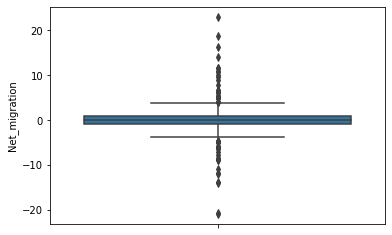

In [29]:
sns.boxplot(countries['Net_migration'], orient='vertical')

In [30]:
# Interquartil
iqt = countries['Net_migration'].quantile(.75) - countries['Net_migration'].quantile(0.25)

# Outliers Abaixo
outliers_baixo = (countries['Net_migration'] < countries['Net_migration'].quantile(0.25) - 1.5*iqt).sum()

#Outliers Acima
outliers_alto = (countries['Net_migration'] > countries['Net_migration'].quantile(0.75) + 1.5*iqt).sum()


In [31]:
def q5():
    return int(outliers_baixo), int(outliers_alto), False

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [32]:
# Colunas
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']

# Dataset
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [33]:
len(newsgroup.data)

1773

In [34]:
count_vectorizer = CountVectorizer()

data_vectorizer = count_vectorizer.fit_transform(newsgroup.data)

In [35]:
count = count_vectorizer.get_feature_names().index('phone')
count

19211

In [36]:
resposta_6 = int(data_vectorizer[:, count].sum())
resposta_6

213

In [37]:
def q6():
    return resposta_6

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [38]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(newsgroup.data)

newsgroups_tfidf_vectorized = tfidf_vectorizer.transform(newsgroup.data)

count = tfidf_vectorizer.get_feature_names().index('phone')

resposta_7 = float(newsgroups_tfidf_vectorized[:, count].sum().round(3))

In [39]:
def q7():
    return resposta_7